# Q15

We will try to predict per capita crime rate using the other variables in the **Boston** data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
import seaborn as sns

Now, we load the **Boston** dataset

In [2]:
#Loading the auto dataset using read_csv function of pandas library as auto.
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
#Printing the data that we loaded
print(boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Simple Linear Regression of all the predictors indivually with the response **crim**

In [4]:
predictors = boston.columns.drop("crim")
slr_coeffs = []
slr_eval = []
for pred in predictors:
    lm = sm.OLS(boston["crim"], sm.add_constant(boston[pred])).fit()
    slr_coeffs.append(lm.params[pred])
    slr_eval.append([pred, np.round(lm.pvalues[pred], decimals = 4), np.round(lm.rsquared , decimals=4)])
    print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.51e-06
Time:                        17:46:34   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

In [5]:
results = pd.DataFrame(columns=['predictor','p-value','r-squared'], data = slr_eval)
print(results)

   predictor  p-value  r-squared
0         zn   0.0000     0.0402
1      indus   0.0000     0.1653
2       chas   0.2094     0.0031
3        nox   0.0000     0.1772
4         rm   0.0000     0.0481
5        age   0.0000     0.1244
6        dis   0.0000     0.1441
7        rad   0.0000     0.3913
8        tax   0.0000     0.3396
9    ptratio   0.0000     0.0841
10         b   0.0000     0.1483
11     lstat   0.0000     0.2076
12      medv   0.0000     0.1508


As evident from the p-values,almost all the predictors have a significant relatinship with the response **crim** except **chas** which has a p-value of 0.209. The R-stastic values for each of the regressions wasn't significant enough as well.

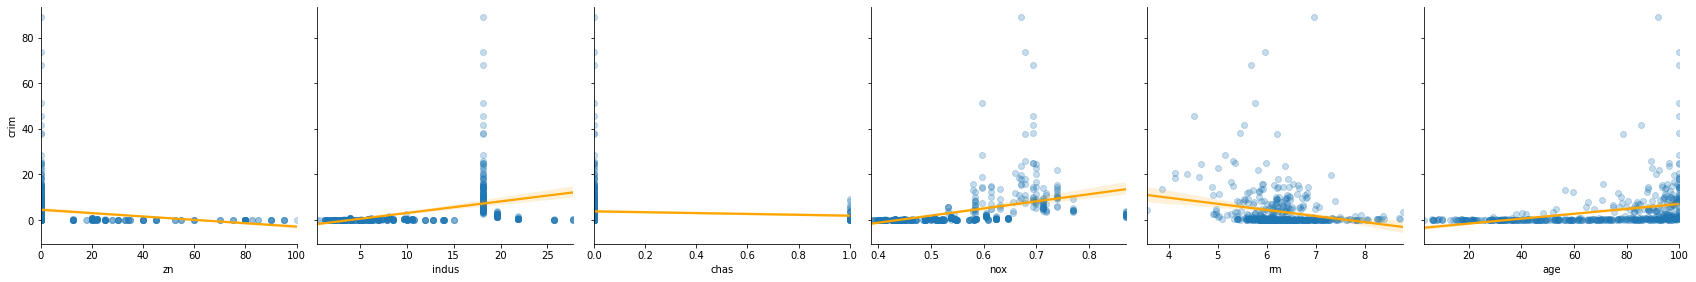

In [6]:
slrplot = sns.PairGrid(data = boston, x_vars = predictors[:6], y_vars = ["crim"], height = 4)
slrplot.map(sns.regplot, scatter_kws = {"alpha":0.25}, line_kws = {"color": "orange"})

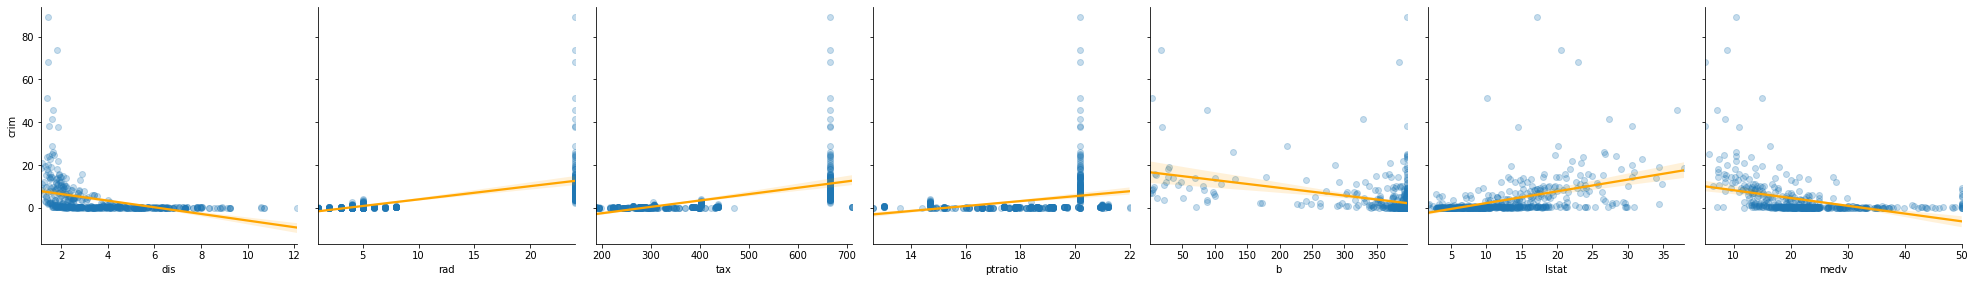

In [7]:
slrplot = sns.PairGrid(data = boston, x_vars = predictors[6:13], y_vars = ["crim"], height = 4)
slrplot.map(sns.regplot, scatter_kws = {"alpha":0.25}, line_kws = {"color": "orange"})

### Multiple linear regression of all the predictors with **crim**

In [8]:
mlr = sm.OLS(boston["crim"], sm.add_constant(boston[predictors])).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        17:46:37   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

The overall fit of the Multiple linear regression model is much better than the best of the simple linear regression models we saw, evident by the comparison of R-squared value. However, many of the factors have significant p-values thus making it difficult to reject the null hypothesis for them straightaway. As we can see only dis and rad have strong enough evidence to reject the null hypothesis, while at a 5% cutoff, we can reject the null hypothesis for zn as well and nox becomes a borderline case.

Text(0, 0.5, 'Multivariate Reg Coeff')

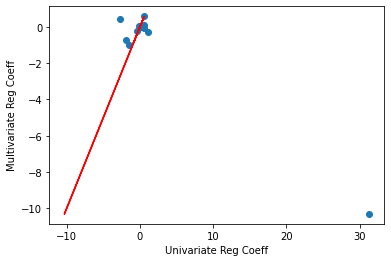

In [9]:
mlr_coeffs = []
for pred in predictors:
    mlr_coeffs.append(mlr.params[pred])

urc = np.array(slr_coeffs)
mrc = np.array(mlr_coeffs)
plt.scatter(urc, mrc)
plt.plot(mrc, mrc, color = 'red') #plotting y=x
plt.xlabel('Univariate Reg Coeff')
plt.ylabel('Multivariate Reg Coeff')

The y = x line helps us recognise which parameters have their multivariate regression coefficient greater than their univariate regression coefficient and which don't. While we observe that one point deviates significantly from the line of balance.